In [1]:
from re import match
from os import listdir
from path import Path
import numpy as np
import pandas as pd

In [2]:
### Input parameters
main_path = Path(".")                       # Path to input xlsx files containing the data
files = [main_path / Path(f) for f in listdir(main_path) if f.endswith("xlsx")]
ID_col, t_col = "ID number", "Time taken"   # Column headers for ID & time taken per quiz
reject_distance = 2                         # Reject outliers that are this far from the data's median

In [3]:
### Print input files, just to show the sample data contained here
for f in files:
    print("File:\t", f, "\n", pd.read_excel(f), "\n\n")

File:	 .\quiz1.xlsx 
   Family name       First name    ID number CSE username     Email address  \
0      Mingus          Charles  123456789.0      charlie  charlie@jazz.com   
1    Coltrane             John  987654321.0        trane    trane@jazz.com   
2         NaN  Overall average          NaN          NaN               NaN   

      State           Started on              Completed        Time taken  \
0  Finished  20 July 2020  01:25  31 August 2020  18:40  42 days 17 hours   
1  Finished  20 July 2020  12:54    20 July 2020  19:49   6 hours 54 mins   
2       NaN                  NaN                    NaN               NaN   

   Grade/4.00  Q. 1 /1.00  Q. 2 /1.00  Q. 3 /1.00  Q. 4 /1.00  
0       2.670           1           1       0.330       0.330  
1       4.000           1           1       1.000       1.000  
2       3.335           1           1       0.665       0.665   


File:	 .\quiz2.xlsx 
   Family name       First name    ID number CSE username  \
0      Mingus  

In [4]:
### Helper functions
def parse_t(t: str) -> float:
    """Parses 'DD day(s) HH hour(s) MM min(s) SS sec(s)' and returns minutes."""
    d, h, m, s = match(
            "(?:(\d+) day(?:s?)(?: ?))?(?:(\d+) hour(?:s?)(?: ?))?(?:(\d+) min(?:s?)(?: ?))?(?:(\d+) sec(?:s?)(?: ?))?", 
            t.strip()
        ).groups()
    return ((int(d or 0) * 60 * 60 * 24) + (int(h or 0) * 60 * 60) + (int(m or 0) * 60) + int(s or 0)) / 60

def reject_outliers(data, m=2.):
    """Rejects outliers that are 'm' far from the data's median."""
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

In [5]:
### Sum total time for each ID
total_t = pd.DataFrame({ID_col: [], t_col: []}).set_index(ID_col)
for f in files:
    df = pd.read_excel(f, usecols=[ID_col, t_col], na_values="-").dropna().astype({ID_col: int}).set_index(ID_col)
    total_t = total_t.append(df[t_col].map(parse_t).groupby(ID_col).agg('sum').to_frame())
total_t = total_t[t_col].groupby(ID_col).agg('sum')
total_t = reject_outliers(total_t, reject_distance)

Mean:	 1164.5083333333332
Median:	 1164.5083333333332


<AxesSubplot:ylabel='Frequency'>

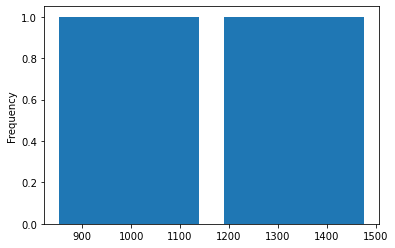

In [6]:
### Print the data as a histogram
print("Mean:\t", np.mean(total_t))
print("Median:\t", np.median(total_t))
total_t.plot.hist(bins=2, rwidth=0.85)